In [ ]:
import numpy as np
import pandas as pd

Cleaned(pre-processed) testing data

In [ ]:
test=pd.read_csv('cleaned_test.csv')

Cleaned training data

In [ ]:
train=pd.read_csv('cleaned1.csv')

In [ ]:
train.head()

,Unnamed: 0,Date_of_tweet,Tweet,Likes_on_tweet,Tweet_punct,Tweet_tokenized,Tweet_nonstop,Tweet_stemmed,Tweet_lemmatized,Polarity,Subjectivity
0,0,2020-08-04 23:31:59+00:00,Historically #TamilNadu has been a state with ...,1,Historically TamilNadu has been a state with p...,"['historically', 'tamilnadu', 'has', 'been', '...","['historically', 'tamilnadu', 'state', 'progre...","['histor', 'tamilnadu', 'state', 'progress', '...","['historically', 'tamilnadu', 'state', 'progre...",0.232000,0.368000
1,1,2020-08-04 23:31:56+00:00,#HelloStrangerEP6 #HarrisonFord #GeorgeFloyd #...,0,HelloStrangerEP HarrisonFord GeorgeFloyd JiCha...,"['hellostrangerep', 'harrisonford', 'georgeflo...","['hellostrangerep', 'harrisonford', 'georgeflo...","['hellostrangerep', 'harrisonford', 'georgeflo...","['hellostrangerep', 'harrisonford', 'georgeflo...",0.000000,0.000000
2,2,2020-08-04 22:22:30+00:00,@cbseindia29 @PMOIndia @narendramodi @DrRPNish...,1,cbseindia PMOIndia narendramodi DrRPNishank AB...,"['cbseindia', 'pmoindia', 'narendramodi', 'drr...","['cbseindia', 'pmoindia', 'narendramodi', 'drr...","['cbseindia', 'pmoindia', 'narendramodi', 'drr...","['cbseindia', 'pmoindia', 'narendramodi', 'drr...",-0.015909,0.394886
3,3,2020-08-04 22:20:56+00:00,@PMOIndia’s anti-democratic #NEP2020 was 400+ ...,1,PMOIndia’s antidemocratic NEP was pgs in dra...,"['pmoindia', 's', 'antidemocratic', 'nep', 'wa...","['pmoindia', 'antidemocratic', 'nep', 'pgs', '...","['pmoindia', 'antidemocrat', 'nep', 'pg', 'dra...","['pmoindia', 'antidemocratic', 'nep', 'pgs', '...",0.375000,0.750000
4,4,2020-08-04 21:01:14+00:00,The latest The Nursing Education Daily! http:/...,0,The latest The Nursing Education Daily httpned...,"['the', 'latest', 'the', 'nursing', 'education...","['latest', 'nursing', 'education', 'daily', 'h...","['latest', 'nurs', 'educ', 'daili', 'httpnedsk...","['latest', 'nursing', 'education', 'daily', 'h...",0.233333,0.366667


In [ ]:
X_test = test['Tweet_lemmatized']

In [ ]:
X_test

0      ['rt', 'rajsahni', 'national', 'institute', 't...
1      ['rt', 'tataclassedge', 'greeting', 'auspiciou...
2      ['greeting', 'auspicious', 'occasion', 'ram', ...
3      ['rt', 'kumaramitmea', 'wonderful', 'discussio...
4      ['rt', 'eduminofindia', 'aapbhibanebhagidar', ...
                             ...                        
525    ['prof', 'op', 'kalra', 'vicechancellor', 'sgt...
526    ['math', 'optional', 'ugdiploma', 'engineering...
527    ['rt', 'narayandojo', 'session', 'kuch', 'naya...
528    ['session', 'kuch', 'naya', 'seekhate', 'hai',...
529    ['rt', 'sarveshgoel', 'two', 'day', 'conventio...
Name: Tweet_lemmatized, Length: 530, dtype: object

Calculating sentiment of each tweet in training data

In [ ]:
# Function that classifies polarities
def classify_polarity(polarity):
    if polarity > 0:
        return "Positive"
    if polarity == 0:
        return "Neutral"
    if polarity < 0:
        return "Negative"

# Applies the funtion on Polarity column and add the results into a new column "Label"
train["Label"] = train["Polarity"].apply(classify_polarity)

 # determine if sentiment is positive, negative, or neutral
def sentiment_value(Label):    
        if Label =="Positive":
            return 1
        elif Label == "Neutral":
            return 0
        else:
            return -1
            
train["sentiment"]=train["Label"].apply(sentiment_value) 

In [ ]:
train.head()

,Unnamed: 0,Date_of_tweet,Tweet,Likes_on_tweet,Tweet_punct,Tweet_tokenized,Tweet_nonstop,Tweet_stemmed,Tweet_lemmatized,Polarity,Subjectivity,Label,sentiment
0,0,2020-08-04 23:31:59+00:00,Historically #TamilNadu has been a state with ...,1,Historically TamilNadu has been a state with p...,"['historically', 'tamilnadu', 'has', 'been', '...","['historically', 'tamilnadu', 'state', 'progre...","['histor', 'tamilnadu', 'state', 'progress', '...","['historically', 'tamilnadu', 'state', 'progre...",0.232000,0.368000,Positive,1
1,1,2020-08-04 23:31:56+00:00,#HelloStrangerEP6 #HarrisonFord #GeorgeFloyd #...,0,HelloStrangerEP HarrisonFord GeorgeFloyd JiCha...,"['hellostrangerep', 'harrisonford', 'georgeflo...","['hellostrangerep', 'harrisonford', 'georgeflo...","['hellostrangerep', 'harrisonford', 'georgeflo...","['hellostrangerep', 'harrisonford', 'georgeflo...",0.000000,0.000000,Neutral,0
2,2,2020-08-04 22:22:30+00:00,@cbseindia29 @PMOIndia @narendramodi @DrRPNish...,1,cbseindia PMOIndia narendramodi DrRPNishank AB...,"['cbseindia', 'pmoindia', 'narendramodi', 'drr...","['cbseindia', 'pmoindia', 'narendramodi', 'drr...","['cbseindia', 'pmoindia', 'narendramodi', 'drr...","['cbseindia', 'pmoindia', 'narendramodi', 'drr...",-0.015909,0.394886,Negative,-1
3,3,2020-08-04 22:20:56+00:00,@PMOIndia’s anti-democratic #NEP2020 was 400+ ...,1,PMOIndia’s antidemocratic NEP was pgs in dra...,"['pmoindia', 's', 'antidemocratic', 'nep', 'wa...","['pmoindia', 'antidemocratic', 'nep', 'pgs', '...","['pmoindia', 'antidemocrat', 'nep', 'pg', 'dra...","['pmoindia', 'antidemocratic', 'nep', 'pgs', '...",0.375000,0.750000,Positive,1
4,4,2020-08-04 21:01:14+00:00,The latest The Nursing Education Daily! http:/...,0,The latest The Nursing Education Daily httpned...,"['the', 'latest', 'the', 'nursing', 'education...","['latest', 'nursing', 'education', 'daily', 'h...","['latest', 'nurs', 'educ', 'daili', 'httpnedsk...","['latest', 'nursing', 'education', 'daily', 'h...",0.233333,0.366667,Positive,1


In [ ]:
#Selecting the features and the target variable
X = train['Tweet_lemmatized']
y = train["sentiment"]

In [ ]:
y

0       1
1       0
2      -1
3       1
4       1
       ..
6853    1
6854    1
6855    0
6856    0
6857    1
Name: sentiment, Length: 6858, dtype: int64

Splitting the training dataset as training and validation 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

X_train, X_val, y_train, y_val= train_test_split(X, y, test_size=0.2, random_state=43, stratify=y)

Vectorizing the training, testing and validation datasets

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorize = TfidfVectorizer()

# Fits the vectorizer with the training data
X_train = vectorize.fit_transform(X_train)

# Fits the validation data with the vectorizer
X_val = vectorize.transform(X_val)
tfidf_test = vectorize.transform(X_test)

Using SMOTE to deal with class imbalance in the training data

In [ ]:
# import SMOTE module from imblearn library
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train.ravel())



print("After OverSampling, counts of label '1': {}".format(sum(y_train_smote == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_smote == 0)))
print("After OverSampling, counts of label '-1': {}".format(sum(y_train_smote == -1)))

After OverSampling, counts of label '1': 3071
After OverSampling, counts of label '0': 3071
After OverSampling, counts of label '-1': 3071


Training the model using SVM

In [ ]:
from sklearn import svm

In [ ]:
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(X_train_smote, y_train_smote)

SVC(gamma='auto', kernel='linear')

__To check the accuracy, predicting the values of X_val and comparing with y_val__

In [ ]:
# predict the labels on validation dataset
predictions_SVM = SVM.predict(X_val)

In [ ]:
# Prints the confusion matrix 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
cm = confusion_matrix(y_val, predictions_SVM)
print("Confusion Matrix\n")
print(cm)

print(classification_report(y_val,predictions_SVM))

Confusion Matrix

[[106  29  52]
 [ 23 347  47]
 [ 21  68 679]]
              precision    recall  f1-score   support

          -1       0.71      0.57      0.63       187
           0       0.78      0.83      0.81       417
           1       0.87      0.88      0.88       768

    accuracy                           0.83      1372
   macro avg       0.79      0.76      0.77      1372
weighted avg       0.82      0.83      0.82      1372



__Predicting the values of testing data__

In [ ]:
pred = SVM.predict(tfidf_test)

In [ ]:
pred

array([ 0,  0,  0,  1,  1,  1, -1,  1,  0,  1,  1,  1,  1,  1,  0,  0,  0,
        1,  1,  1,  1,  0,  0,  1,  0,  0,  0,  0,  0,  1,  0,  0,  1,  0,
        0,  0,  0,  1,  0,  0,  0,  0,  1,  0,  1,  1,  0,  0,  1,  0,  1,
        0,  0, -1,  0,  0,  0,  0,  0,  1,  1,  1,  0,  0,  1,  0,  0,  1,
        0,  0,  0,  1,  0,  1,  1,  0,  0,  0,  0,  1,  0,  1,  1,  1, -1,
        0,  0,  1,  0,  0,  1,  1, -1,  0,  0,  1,  0,  0,  0,  1,  0,  1,
        1, -1,  1,  1,  0,  1,  1,  0,  0, -1, -1, -1,  0,  1,  1,  0,  1,
        0, -1,  1,  1,  0,  1, -1, -1,  0,  1,  0, -1,  0, -1, -1, -1, -1,
       -1, -1,  0, -1,  0,  0,  0, -1,  0, -1, -1,  0,  0, -1,  0, -1, -1,
        0,  0, -1, -1,  0,  1,  0,  0,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        0,  1,  1,  1,  1,  1,  1,  1,  0,  0,  1,  1,  1,  0,  0,  1,  1,
        1,  0,  1,  0,  1,  1,  0,  1,  0,  0, -1,  0,  0,  1,  1, -1,  1,
        1,  1,  0,  0,  0,  0,  0, -1,  0,  1,  0,  0,  1,  0,  0,  1,  0,
        1,  0,  1,  1,  0

In [ ]:
pd.DataFrame(X_test)

,Tweet_lemmatized
0,"['rt', 'rajsahni', 'national', 'institute', 't..."
1,"['rt', 'tataclassedge', 'greeting', 'auspiciou..."
2,"['greeting', 'auspicious', 'occasion', 'ram', ..."
3,"['rt', 'kumaramitmea', 'wonderful', 'discussio..."
4,"['rt', 'eduminofindia', 'aapbhibanebhagidar', ..."
...,...
525,"['prof', 'op', 'kalra', 'vicechancellor', 'sgt..."
526,"['math', 'optional', 'ugdiploma', 'engineering..."
527,"['rt', 'narayandojo', 'session', 'kuch', 'naya..."
528,"['session', 'kuch', 'naya', 'seekhate', 'hai',..."


In [ ]:
df1 = pd.DataFrame(pred)

In [ ]:
result = pd.concat([X_test, df1], axis=1)

In [ ]:
result.head(20)

,Tweet_lemmatized,0
0,"['rt', 'rajsahni', 'national', 'institute', 't...",0
1,"['rt', 'tataclassedge', 'greeting', 'auspiciou...",0
2,"['greeting', 'auspicious', 'occasion', 'ram', ...",0
3,"['rt', 'kumaramitmea', 'wonderful', 'discussio...",1
4,"['rt', 'eduminofindia', 'aapbhibanebhagidar', ...",1
5,"['kaviclasses', 'nctedelhi', 'dpradhanbjp', 'a...",1
6,"['rt', 'airnewsalerts', 'per', 'provision', 'n...",-1
7,"['rt', 'airnewsalerts', 'pursuance', 'national...",1
8,"['honoured', 'felicitated', 'dr', 'jsshunty', ...",0
9,"['rt', 'humaira', 'carrying', 'mission', 'insp...",1


In [ ]:
result.columns

Index(['Tweet_lemmatized', 0], dtype='object')

In [ ]:
result[0].value_counts()

 0    296
 1    161
-1     73
Name: 0, dtype: int64

#### We can observe that there are
- 296 tweets which are categorized as neutral
- 161 tweets which are categorized as positive
- 73 tweets which are categorized as negative

In [ ]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


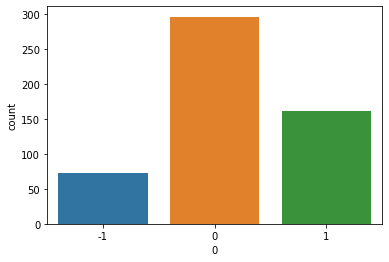

In [ ]:
sns.countplot(result[0],data=result)

Many of the tweets belong to neutral class. From this, we can conclude that a major portion of citizens neither support nor oppose the National Education Policy 2020.